# Base Model Training

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                                classification_report,
                                confusion_matrix,
                                roc_auc_score,
                                roc_curve,
                                precision_recall_curve,
                                f1_score,
                                precision_score,
                                recall_score,
                                accuracy_score
                            )
warnings.filterwarnings('ignore')


In [9]:
seed = 42
np.random.seed(seed=42)

## Quick Overview of Logistic Regression

Y_hat(Z) = 1 / (1 + exp(-z))

Text(0, 0.5, 'Y_hat')

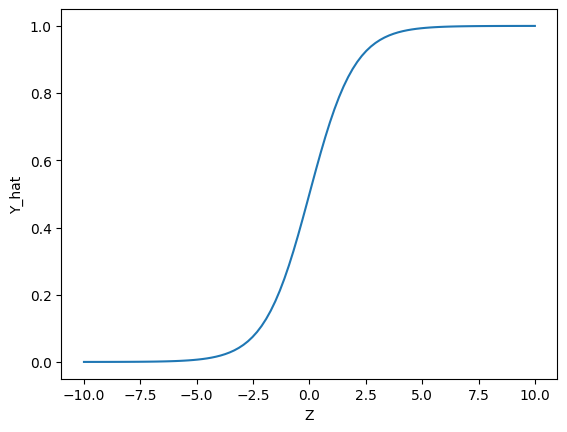

In [5]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)
plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')


## Load the Data

In [8]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']


### Model Training

In [ ]:
model_lr = LogisticRegression(
                                random_state=42, # Used in Shuffling data set and more etc..
                                max_iter=1000
                            )

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Inference

In [ ]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)


Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [12]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0])

In [14]:
Y_proba_train

array([[0.9239779 , 0.0760221 ],
       [0.6367169 , 0.3632831 ],
       [0.75965271, 0.24034729],
       ...,
       [0.27245676, 0.72754324],
       [0.43561915, 0.56438085],
       [0.58928312, 0.41071688]])

In [17]:
accuaracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [18]:
print(f"Accuarcy: {accuaracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 Score: {f1_score}")

Accuarcy: 0.7125
Precision: 0.37
Recall: 0.6590330788804071
f1 Score: 0.4739249771271729


Text(50.722222222222214, 0.5, 'Actual')

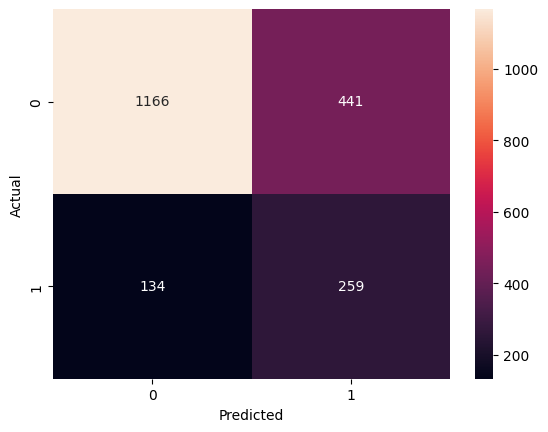

In [21]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Values in Dialoganl are Correct Values

## Confusion Matrix for Training Set

Text(50.722222222222214, 0.5, 'Actual')

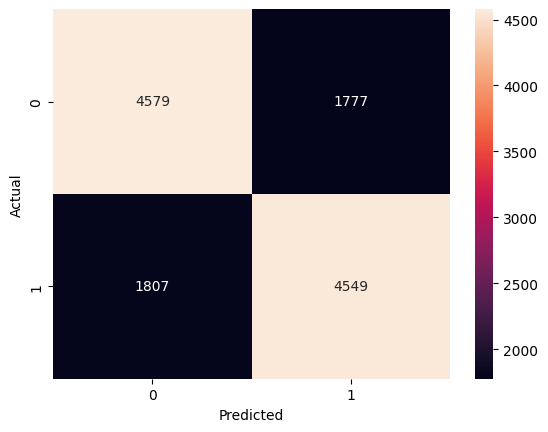

In [22]:
cm = confusion_matrix(Y_train, Y_hat_train)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")